In [153]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [154]:
state_changes_info = pd.read_csv("data/Product State Changes from BSS.csv")

state_changes_info.shape



(3028, 13)

In [155]:
state_changes_info

,PRODUCT_LABEL,PRODUCT_LABEL.hash,CUSTOMER_REF,CUSTOMER_REF.hash,ACCOUNT_NUM,ACCOUNT_NUM.hash,PRODUCT_SEQ,START_DAT,END_DAT,PRODUCT_ID,PRODUCT_NAME,EFFECTIVE_DTM,PRODUCT_STATUS
0,112380077,b635fc31617ffc9c1e6b5015fb32e108,CR003493315,3bab8adf192d3b98fc879ad65bf3b1a8,0039107652,a4e4afaedb57f205bfeff624c39fe49d,250,2019-Feb-28 00:00:00,2019-Jun-18 00:00:00,2076,V_Single VAS Bundle,2019-Jun-19 00:00:00,TX
1,412244863,ef74b1171331411a4d2e9fada9158215,CR004101454,395dd9f2747c6fa4336ee794b1cb6d72,0044218857,9c802b6b329dc1e3ba6e6c655a21e65d,14,2019-Dec-19 00:00:00,2020-Jan-18 00:00:00,2693,E_Referral offer Discount,2020-Jan-19 00:00:00,TX
2,112410723,31110bf10f07e3d5e23da9680b1dd287,CR000806265,f72dffa8e0e57e2999859d05fb470b8e,0032400207,1cf3f313f1060c69dfe814a0e8124f18,51,2018-Aug-01 00:00:00,2019-Oct-06 00:00:00,2176,V_Absentee service,2019-Oct-06 09:32:00,TX
3,212061808,b6404a24d0ae0f5dbb11c78c783bd1fc,CR002669085,71a467201a2d56926e6f9e3b162635a5,0031020080,ce8d936fed762bfa12912fb18915b802,93,2018-Sep-21 00:00:00,2019-Jun-29 00:00:00,2173,V_Hotline Service,2019-Jun-29 13:57:00,TX
4,112380077,b635fc31617ffc9c1e6b5015fb32e108,CR003493315,3bab8adf192d3b98fc879ad65bf3b1a8,0039107652,a4e4afaedb57f205bfeff624c39fe49d,252,2019-Feb-28 00:00:00,2019-Jun-18 00:00:00,2165,V_Caller Line Identification,2019-Jun-19 00:00:00,TX
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3023,212280300,155a2049729884b079ccaa8aca315e09,CR002704240,197991049d40e712d4471da75fade116,0035980531,3030f90b7118e741f52dd8421a83145a,34,2018-Aug-01 00:00:00,2019-Jan-30 00:00:00,2123,V_DQ Contact Details,2019-Apr-05 10:11:00,TX
3024,212280300,155a2049729884b079ccaa8aca315e09,CR002704240,197991049d40e712d4471da75fade116,0035980531,3030f90b7118e741f52dd8421a83145a,30,2018-Aug-01 00:00:00,2019-Jan-30 00:00:00,2042,AB_Megaline,2019-Apr-05 10:11:00,TX
3025,212280300,155a2049729884b079ccaa8aca315e09,CR002704240,197991049d40e712d4471da75fade116,0035980531,3030f90b7118e741f52dd8421a83145a,33,2018-Aug-01 00:00:00,2019-Jan-30 00:00:00,2044,AB_Megaline Startup,2019-Apr-05 10:11:00,TX
3026,212280300,155a2049729884b079ccaa8aca315e09,CR002704240,197991049d40e712d4471da75fade116,0035980531,3030f90b7118e741f52dd8421a83145a,35,2018-Aug-01 00:00:00,2019-Jan-30 00:00:00,1570,V_IDD,2019-Apr-05 10:11:00,TX


In [156]:
state_changes_info = state_changes_info.drop(['PRODUCT_LABEL.hash','CUSTOMER_REF','CUSTOMER_REF.hash','ACCOUNT_NUM.hash' ,'PRODUCT_STATUS','PRODUCT_ID','START_DAT','END_DAT','PRODUCT_SEQ'], axis=1)
state_changes_info

,PRODUCT_LABEL,ACCOUNT_NUM,PRODUCT_NAME,EFFECTIVE_DTM
0,112380077,0039107652,V_Single VAS Bundle,2019-Jun-19 00:00:00
1,412244863,0044218857,E_Referral offer Discount,2020-Jan-19 00:00:00
2,112410723,0032400207,V_Absentee service,2019-Oct-06 09:32:00
3,212061808,0031020080,V_Hotline Service,2019-Jun-29 13:57:00
4,112380077,0039107652,V_Caller Line Identification,2019-Jun-19 00:00:00
...,...,...,...,...
3023,212280300,0035980531,V_DQ Contact Details,2019-Apr-05 10:11:00
3024,212280300,0035980531,AB_Megaline,2019-Apr-05 10:11:00
3025,212280300,0035980531,AB_Megaline Startup,2019-Apr-05 10:11:00
3026,212280300,0035980531,V_IDD,2019-Apr-05 10:11:00


In [157]:
state_changes_info.shape

(3028, 4)

## Product List

In [158]:
def create_dict(keys,values):
    return [{k: v} for k, v in zip(keys, values)]

In [159]:
product_name_list = state_changes_info['PRODUCT_NAME'].unique()
product_label_list = state_changes_info['PRODUCT_LABEL'].unique()
product_list = create_dict(product_label_list, product_name_list)

In [160]:
product_name_list

array(['V_Single VAS Bundle', 'E_Referral offer Discount',
       'V_Absentee service', 'V_Hotline Service',
       'V_Caller Line Identification', 'V_Call Forwarding Offline',
       'V_Abbreviated Dialing', 'V_Call Transfer Three way',
       'V_Call Forwarding', 'V_Call Waiting',
       'V_Call Forwarding-Immediate', 'V_Outgoing Call Memory',
       'V_Call Forwarding-On Busy', 'V_Call Forwarding-No Answer',
       'V_Cordeless Phone - Installment', 'E_PeoTV Initiation',
       'V_Selective call acceptance', 'V_Hotline-Immediate',
       'V_Call holding', 'V_Hotline-Time Delayed',
       'V_Call Forwarding by time', 'V_Incoming Call Memory',
       'V_Short Message Service', 'M_Activation Charge',
       'E_Video on Demand', 'AB_Megaline', 'E_TSTV',
       'V_Secretary service', 'V_Call park', 'V_Selective call rejection',
       'V_Call back on busy', 'V_Call Forwarding - Immediate',
       'V_Anonymous call barring', 'V_Call Forwarding - On Busy',
       'V_Incoming Call Transfer'

In [161]:
product_label_list

array([112380077, 412244863, 112410723, 212061808, 212061851, 382247139,
       112411239, 452287835, 312298888, 112722882, 552294670, 382251226,
       382250220, 382251349, 112905591, 552294650, 112716920, 452285106,
       382251380, 352052328, 112889887, 382232195, 112411777, 382246601,
       272050266, 552051358, 112730400, 112731056, 112715838, 112718785,
       112716482, 112716512, 382248451, 112199988, 112816435, 452287023,
       522237159, 212213103, 112910146, 912255127, 912255119, 272050280,
       112911252, 382251180, 112816134, 312298290, 212061867, 112074949,
       522237444, 112411100, 112852850, 112918431, 662246028, 472233311,
       112914594, 112910698, 312297180, 112717026, 662224074, 382246359,
       662051756, 112719267, 662058028, 212061870, 312299219, 552270072,
       382251089, 112810368, 112380075, 112410305, 452289474, 912253543,
       522237020, 112909042, 112073003, 112853897, 352221766, 452286720,
       112710301, 252276802, 522237101, 112816445, 

In [162]:
product_list

[{112380077: 'V_Single VAS Bundle'},
 {412244863: 'E_Referral offer Discount'},
 {112410723: 'V_Absentee service'},
 {212061808: 'V_Hotline Service'},
 {212061851: 'V_Caller Line Identification'},
 {382247139: 'V_Call Forwarding Offline'},
 {112411239: 'V_Abbreviated Dialing'},
 {452287835: 'V_Call Transfer Three way'},
 {312298888: 'V_Call Forwarding'},
 {112722882: 'V_Call Waiting'},
 {552294670: 'V_Call Forwarding-Immediate'},
 {382251226: 'V_Outgoing Call Memory'},
 {382250220: 'V_Call Forwarding-On Busy'},
 {382251349: 'V_Call Forwarding-No Answer'},
 {112905591: 'V_Cordeless Phone - Installment'},
 {552294650: 'E_PeoTV Initiation'},
 {112716920: 'V_Selective call acceptance'},
 {452285106: 'V_Hotline-Immediate'},
 {382251380: 'V_Call holding'},
 {352052328: 'V_Hotline-Time Delayed'},
 {112889887: 'V_Call Forwarding by time'},
 {382232195: 'V_Incoming Call Memory'},
 {112411777: 'V_Short Message Service'},
 {382246601: 'M_Activation Charge'},
 {272050266: 'E_Video on Demand'},
 {5

## Analysis

- 1. group by Account-num
- 2. group products purchased by cutomers

In [163]:
state_df = state_changes_info 
state_df["Product_Count"] = 1
state_df_count = state_df.groupby(['ACCOUNT_NUM'], axis=0,as_index=False).sum()
state_df_count

,ACCOUNT_NUM,PRODUCT_LABEL,Product_Count
0,0000485266,5402510200,48
1,0000844614,452288454,1
2,0000892896,664570176,2
3,0001018689,1124105700,10
4,0001020421,337232244,3
...,...,...,...
409,0044612965,382221061,1
410,0044613050,382221058,1
411,0044613157,382221060,1
412,004461323X,382221063,1


In [164]:
state_df_count.to_csv("data/user_profile/Product_Map_Per_Account_Name_Simplified.csv")

In [114]:
state_df.isnull().sum(axis=0)

PRODUCT_LABEL    0
ACCOUNT_NUM      0
PRODUCT_NAME     0
EFFECTIVE_DTM    0
Product_Count    0
dtype: int64

In [115]:
list_df = state_df.groupby('ACCOUNT_NUM', as_index=False).agg(list)
list_df

,ACCOUNT_NUM,PRODUCT_LABEL,PRODUCT_NAME,EFFECTIVE_DTM,Product_Count
0,0000485266,"[112889887, 112889887, 112411777, 112411777, 1...","[V_Call Forwarding - Immediate, V_Call Forward...","[2019-Jun-13 09:34:00, 2019-Jun-13 09:34:00, 2...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
1,0000844614,[452288454],[M_Activation Charge],[2019-May-01 00:00:00],[1]
2,0000892896,"[332285088, 332285088]","[V_Call Forwarding, V_Hotline Service]","[2020-Mar-20 11:37:00, 2020-Mar-20 11:37:00]","[1, 1]"
3,0001018689,"[112410570, 112410570, 112410570, 112410570, 1...","[V_Call Waiting, V_Hotline Service, V_Absentee...","[2019-May-31 11:09:00, 2019-May-31 11:09:00, 2...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]"
4,0001020421,"[112410748, 112410748, 112410748]","[E_Video on Demand, E_PeoTV Initiation, E_TSTV]","[2020-Jul-01 14:47:00, 2020-Jul-01 14:47:00, 2...","[1, 1, 1]"
...,...,...,...,...,...
409,0044612965,[382221061],[V_Installment],[2020-Jun-15 00:00:00],[1]
410,0044613050,[382221058],[V_Installment],[2020-Jun-15 00:00:00],[1]
411,0044613157,[382221060],[V_Installment],[2020-Jun-15 00:00:00],[1]
412,004461323X,[382221063],[V_Installment],[2020-Jun-17 00:00:00],[1]


In [116]:
state_df_count['PRODUCT_NAMES'] = list_df['PRODUCT_NAME']
state_df_count['PRODUCT_LABELS'] = list_df['PRODUCT_LABEL']
state_df_count

,ACCOUNT_NUM,PRODUCT_LABEL,Product_Count,PRODUCT_NAMES,PRODUCT_LABELS
0,0000485266,5402510200,48,"[V_Call Forwarding - Immediate, V_Call Forward...","[112889887, 112889887, 112411777, 112411777, 1..."
1,0000844614,452288454,1,[M_Activation Charge],[452288454]
2,0000892896,664570176,2,"[V_Call Forwarding, V_Hotline Service]","[332285088, 332285088]"
3,0001018689,1124105700,10,"[V_Call Waiting, V_Hotline Service, V_Absentee...","[112410570, 112410570, 112410570, 112410570, 1..."
4,0001020421,337232244,3,"[E_Video on Demand, E_PeoTV Initiation, E_TSTV]","[112410748, 112410748, 112410748]"
...,...,...,...,...,...
409,0044612965,382221061,1,[V_Installment],[382221061]
410,0044613050,382221058,1,[V_Installment],[382221058]
411,0044613157,382221060,1,[V_Installment],[382221060]
412,004461323X,382221063,1,[V_Installment],[382221063]


In [117]:
state_df_count.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,PRODUCT_LABEL,Product_Count
count,414.00000,414.00000
mean,2277302501.91546,7.31401
std,2805773878.21864,12.81713
min,112074768.00000,1.00000
25%,430621229.00000,2.00000
50%,1146719107.50000,4.00000
75%,2992576752.00000,10.00000
max,25646612553.00000,228.00000


### Creating Product Dictionory Map

In [119]:
state_df_count['PRODUCT_DICT'] = state_df_count.apply(lambda x: create_dict(x['PRODUCT_LABELS'], x['PRODUCT_NAMES']), axis=1)

In [120]:
state_df_count

,ACCOUNT_NUM,PRODUCT_LABEL,Product_Count,PRODUCT_NAMES,PRODUCT_LABELS,PRODUCT_DICT
0,0000485266,5402510200,48,"[V_Call Forwarding - Immediate, V_Call Forward...","[112889887, 112889887, 112411777, 112411777, 1...","[{112889887: 'V_Call Forwarding - Immediate'},..."
1,0000844614,452288454,1,[M_Activation Charge],[452288454],[{452288454: 'M_Activation Charge'}]
2,0000892896,664570176,2,"[V_Call Forwarding, V_Hotline Service]","[332285088, 332285088]","[{332285088: 'V_Call Forwarding'}, {332285088:..."
3,0001018689,1124105700,10,"[V_Call Waiting, V_Hotline Service, V_Absentee...","[112410570, 112410570, 112410570, 112410570, 1...","[{112410570: 'V_Call Waiting'}, {112410570: 'V..."
4,0001020421,337232244,3,"[E_Video on Demand, E_PeoTV Initiation, E_TSTV]","[112410748, 112410748, 112410748]","[{112410748: 'E_Video on Demand'}, {112410748:..."
...,...,...,...,...,...,...
409,0044612965,382221061,1,[V_Installment],[382221061],[{382221061: 'V_Installment'}]
410,0044613050,382221058,1,[V_Installment],[382221058],[{382221058: 'V_Installment'}]
411,0044613157,382221060,1,[V_Installment],[382221060],[{382221060: 'V_Installment'}]
412,004461323X,382221063,1,[V_Installment],[382221063],[{382221063: 'V_Installment'}]


In [152]:
state_df_count.to_csv("data/user_profile/Product_Map_Per_Account_Name.csv")

## ToDo 

- filter free products
- Add agg columns (count, categorical) -> VOICE_PACKAGES / BB_PACKAGES / PEO_TV_PACKAGES


## Analysis Phase 2
- Group by products

In [137]:
state_changes_info

,PRODUCT_LABEL,ACCOUNT_NUM,PRODUCT_NAME,EFFECTIVE_DTM
0,112380077,0039107652,V_Single VAS Bundle,2019-Jun-19 00:00:00
1,412244863,0044218857,E_Referral offer Discount,2020-Jan-19 00:00:00
2,112410723,0032400207,V_Absentee service,2019-Oct-06 09:32:00
3,212061808,0031020080,V_Hotline Service,2019-Jun-29 13:57:00
4,112380077,0039107652,V_Caller Line Identification,2019-Jun-19 00:00:00
...,...,...,...,...
3023,212280300,0035980531,V_DQ Contact Details,2019-Apr-05 10:11:00
3024,212280300,0035980531,AB_Megaline,2019-Apr-05 10:11:00
3025,212280300,0035980531,AB_Megaline Startup,2019-Apr-05 10:11:00
3026,212280300,0035980531,V_IDD,2019-Apr-05 10:11:00


In [140]:
products_df = state_changes_info.drop(['PRODUCT_LABEL','EFFECTIVE_DTM'], axis=1)
products_df["User_Count"] = 1
products_df_count = products_df.groupby(['PRODUCT_NAME'], axis=0,as_index=False).sum()
products_df_count

,PRODUCT_NAME,User_Count
0,AB_Additional Distance,2
1,AB_Citylink Loyalty Rewards,5
2,AB_Copper Access Bearer,11
3,AB_Megaline,73
4,AB_Megaline Startup,35
...,...,...
91,V_Single VAS Bundle,43
92,V_Sisu Connect,1
93,V_Telehealth,1
94,V_Triple VAS Bundle,3


<AxesSubplot:>

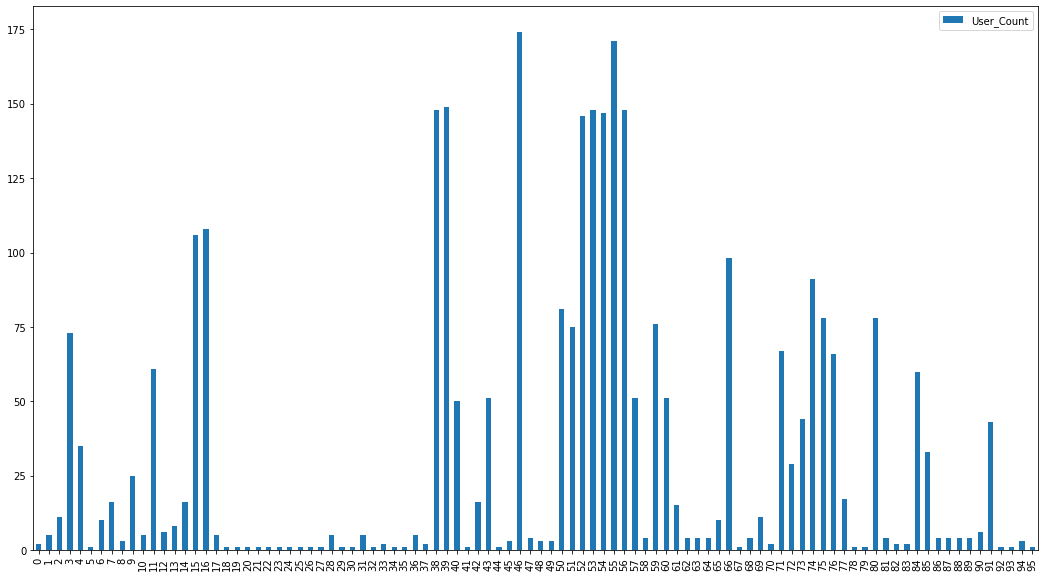

In [149]:
products_df_count.plot(kind="bar", figsize=(18,10))

In [151]:
products_df_count.to_csv("data/user_profile/User_Count_Per_Product_Name.csv")

In [142]:
products_users_df = state_changes_info.drop(['PRODUCT_LABEL','EFFECTIVE_DTM'], axis=1).groupby('PRODUCT_NAME', as_index=False).agg(list)
products_users_df

,PRODUCT_NAME,ACCOUNT_NUM
0,AB_Additional Distance,"[0011284017, 0035629196]"
1,AB_Citylink Loyalty Rewards,"[0029880828, 0019689628, 0031435644, 003766186..."
2,AB_Copper Access Bearer,"[0038397259, 0035952054, 0001888180, 004263719..."
3,AB_Megaline,"[0038605727, 0001472146, 0001469503, 000232718..."
4,AB_Megaline Startup,"[0039107652, 0033400982, 0029033979, 004237114..."
...,...,...
91,V_Single VAS Bundle,"[0039107652, 0001472146, 0001178077, 003860572..."
92,V_Sisu Connect,[0001527147]
93,V_Telehealth,[0029867885]
94,V_Triple VAS Bundle,"[0002988141, 0002888844, 0007731359]"


In [150]:
products_users_df.to_csv("data/user_profile/Account_Nums_Per_Product_Name.csv")